# Algorytmy ewolucyjne 

## Implementacja algorytmu genetycznego – opt. f-cji kwadratowej w $R^3$
Napisać podstawowy algorytm genetyczny z mutacją gaussowską i krzyżowaniem jednopunktowym. Sprawdzić działanie algorytmu na funkcji $x^2+y^2+2z^2$
 oraz na pięciowymiarowej funkcji Rastrigina.
 

In [6]:
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt

In [2]:
class GeneticAlgorithm:
    # this class implements genetic algorithm for finding the maximum of a function
    
    def __init__(self, chromosome_size, population_size, fitness_function, set_chromosomes=None):
        if set_chromosomes is not None:
            self.population = set_chromosomes
        else:
            self.population = np.random.uniform(-1,1, size=(population_size, chromosome_size))
        self.chromosome_size = chromosome_size
        self.population_size = population_size
        self.fitness_function = fitness_function
        self.best_chromosome = None
        self.best_fitness_history = []
        self.avg_fitness_history = []
        
        
    def mutate(self, mutation_coef, generation, generations_number):
        permuted_chromosomes = np.random.permutation(self.population)
        mutated_index = int(mutation_coef * self.population_size) #chose max index for chromosomes to mutate
        if mutated_index == 0:
            mutated_index = 1 #at least one chromosome should be mutated
        # mutate chromosomes of index from 0 to mutated_index
        permuted_chromosomes[:mutated_index] = np.add(permuted_chromosomes[:mutated_index], np.random.normal(0, mutation_coef * (generations_number - generation) / generations_number, size=(mutated_index, self.chromosome_size)))
        self.population = permuted_chromosomes    
        
    def crossover(self, ch_a, ch_b):
        # single point crossover
        split_index = np.random.randint(1, self.chromosome_size-1)
        child_a = np.concatenate((ch_a[:split_index], ch_b[split_index:]))
        child_b = np.concatenate((ch_b[:split_index], ch_a[split_index:]))
        return child_a, child_b
        
        
            
    def pick_elite(self, chromosomes, elite_coef):
        fitness = np.apply_along_axis(self.fitness_function, 1, chromosomes)
        probabilities = fitness / np.sum(fitness)
        best_chromosome = chromosomes[np.argmax(fitness)]
        best_fitness = np.max(fitness)

        if self.best_chromosome is None  or best_fitness > self.best_fitness_history[-1]:
            self.best_chromosome = best_chromosome
            self.best_fitness_history.append(best_fitness)
        else:
            self.best_fitness_history.append(self.best_fitness_history[-1])
        self.avg_fitness_history.append(np.mean(fitness))
        
        elite_index = np.random.choice(self.population_size, size=int(elite_coef * self.population_size), p=probabilities, replace=False)
        elite = chromosomes[elite_index]
        return elite
            
    
    def evolve(self, generations_number, mutation_coef, crossover_coef, elite_coef, verbose=True):
        for generation in range(generations_number):
            permuted_chromosomes = np.random.permutation(self.population)
            elite = self.pick_elite(permuted_chromosomes, elite_coef)
            offspring = []
            while len(offspring) < self.population_size:
                if crossover_coef > np.random.uniform(0,1):
                    idx_a, idx_b = np.random.choice(len(elite), size=2, replace=False)
                    offspring.extend(self.crossover(elite[idx_a],elite[idx_b])) 
                else:
                    offspring.append(elite[np.random.choice(len(elite))])                   
            self.population = np.array(offspring[:self.population_size]) # cut off extra chromosomes
            self.mutate(mutation_coef, generation, generations_number)
            
            # pring progress every 10 generations
            if verbose and (generation+1) % 10 == 0:
                print('Generation: ', generation+1, 'Best fitness: ', 1/self.best_fitness_history[-1],end='\r')
        
        
        
        
        
        
    

In [3]:
def quadratic(vals):
    x, y, z = vals
    return 1/(x**2 + y**2 + 2*z**2)

def rastrigin(x,dims):
    return 1/(10*dims + np.sum(x**2 - 10*np.cos(2*np.pi*x), axis=0))

In [4]:
chromosome_size, population_size = 3, 100
ga = GeneticAlgorithm(chromosome_size,population_size, quadratic, set_chromosomes=np.random.uniform(-100,100,size=(population_size,chromosome_size)))
ga.evolve(100, 1, 1, 0.4)

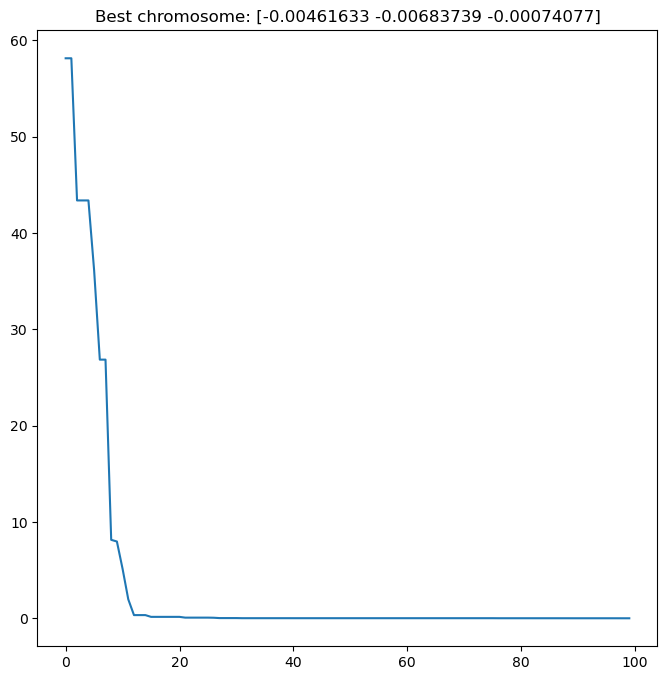

In [18]:
plt.figure(figsize=(8,8))
plt.plot(1/np.array(ga.best_fitness_history), label='best')
plt.title(f"Best chromosome: {ga.best_chromosome}")
plt.show()

In [21]:
rastrigin_5dim = partial(rastrigin, dims=5)
chromosome_size, population_size = 5, 100
ga1 = GeneticAlgorithm(chromosome_size,population_size, rastrigin_5dim, set_chromosomes=np.random.uniform(-100,100,size=(population_size,chromosome_size)))
ga1.evolve(2000, 0.4, 1, 0.5)


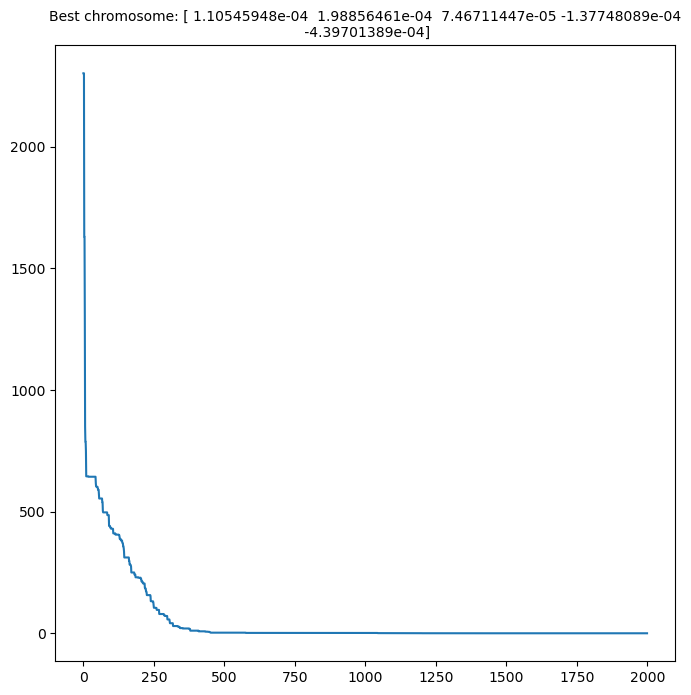

In [25]:
plt.figure(figsize=(8,8))
plt.plot(1/np.array(ga1.best_fitness_history), label='best')
plt.title(f"Best chromosome: {ga1.best_chromosome}", fontdict={'fontsize': 10})
plt.show()